In [17]:
#Obersvation Table 2 Analysis Multivariable  Linear regression

import numpy as np
import pandas as pd

# Load and prepare your data
# Create a matrix of independent variables (X) with an added column of ones
X = np.array([ [1,8,110],
               [1,11,120],
               [1,10,550],
               [1,8,295],
               [1,15,250],
               [1,9,100],
               [1,8,300],
               [1,11,400],
               [1,12,500],
               [1,10,540] ] )

# Create a vector of the dependent variable (Y)
Y = np.array([24,32,35,25,45,24,27,37,42,35])

# Calculate beta coefficients
X_T = X.T  # Transpose of X
X_T_X = np.dot(X_T, X)  # X^T * X
X_T_X_inv = np.linalg.inv(X_T_X)  # (X^T * X)^(-1)
X_T_Y = np.dot(X_T, Y)  # X^T * Y
beta = np.dot(X_T_X_inv, X_T_Y)  # Beta coefficients
y_cap= np.dot(X,beta)
print(beta)

print(y_cap)



[-2.18285396  2.90226237  0.01636581]
[22.83548371 31.70592888 35.84096339 25.86315795 45.44253322 25.57408801
 25.94498698 36.28835475 40.82719779 35.67730532]


In [12]:
err= Y-y_cap # error
print(err)
err_T=err.T # error transpose
err_sq=(Y-y_cap)**2 # error squared
print(err_sq)


[ 1.16451629  0.29407112 -0.84096339 -0.86315795 -0.44253322 -1.57408801
  1.05501302  0.71164525  1.17280221 -0.67730532]
[1.35609819 0.08647782 0.70721942 0.74504164 0.19583565 2.47775307
 1.11305247 0.50643896 1.37546503 0.4587425 ]


In [13]:
y_mean=sum(Y)/10
print(y_mean)

print((y_cap-y_mean)**2)

32.6
[ 95.34577835   0.79936317  10.50384368  45.38504083 164.93065945
  49.36343926  44.28919827  13.60396078  67.68678344   9.46980804]


In [16]:
SSE=np.dot(err_T, err)
print(SSE)

MSE= SSE/(10-2-1) # MSE=SSE/N-K-1
print(MSE)

9.022124745215532
1.2888749636022188


In [30]:
A = y_cap-y_mean
B = A.T
SSR= np.dot( A,B )
print(SSR)
MSR=SSR/2  # MSR=SSR/k
print(MSR)
F=MSR/MSE
print(F)

501.37787525478376
250.68893762739188
194.50213923525416


In [31]:
SST=SSR+SSE
R_sq=SSR/SST # R-squared
print(R_sq)

0.9823234233048285


In [17]:
# 2nd Housing Data model
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded=files.upload()
house_df=pd.read_csv('HousingData.csv')
X_features =house_df.columns[0:13] #Column 0-13 assigning them as x1,x2,x3,...
print(X_features)

X=sm.add_constant(house_df[X_features])
Y=house_df["MEDV"]  # Column 14 is assigned to Y


train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.75,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()

Saving HousingData.csv to HousingData (2).csv
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.780    
Dependent Variable: MEDV             AIC:                1692.7592
Date:               2023-10-15 19:10 BIC:                1744.3769
No. Observations:   295              Log-Likelihood:     -832.38  
Df Model:           13               F-statistic:        81.04    
Df Residuals:       281              Prob (F-statistic): 6.06e-87 
R-squared:          0.789            Scale:              17.357   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
const         34.0916    6.0284   5.6552  0.0000   22.2251  45.9582
CRIM          -0.1187    0.0315  -3.7686  0.0002   -0.1807  -0.0567
ZN             0.0480    0.0158   3.0383  0.0026    0.0169   0.0790
INDUS          0.0165    0.0757   0.2185  0.8272   -0.1325   0.1655
CHAS           1.2854    1.0026   1.2821  0.2009   -0.6882   3.2589
NOX          -16.9912    4.4218  -3.8426  0.0002  -25.6952  -8.2872
RM             4.0877    0.4940   8.2740  0.0000    3.1152   5.0602
AGE           -0.0248    0.0152  -1.6326  0.1037   -0.0547   0.0051
DIS           -1.4947    0.2317  -6.4516  0.0000   -1.9507  -1.0386
RAD            0.2631    0.0752   3.4989  0.0005    0.1151   0.4112
TAX           -0.0140    0.0044  -3.1896  0.0016   -0.0227  -0.0054
PTRATIO       -0.9012    0.1531  -5.8862  0.0000   -1.2025  -0.5998
B              0.0096    0.0029   3.2785  0.0012    0.0038   0.0154
LSTAT         -0.3644    0.0564  -6.4656  0.0000   -0.4753  -0.2534
------------------------------------------------------------------
Omnibus:              90.089       Durbin-Watson:          1.736  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       272.918
Skew:                 1.352        Prob(JB):               0.000  
Kurtosis:             6.859        Condition No.:          15532  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

Saving group1.csv to group1 (3).csv
Index(['W_d', 'epsilon_d', 'zs', 'zd', '1/r0', 'Ed', 'kappa_d'], dtype='object')


<ipython-input-26-2c8f3eb756ce>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_df=house_df[cols].corr()


<Axes: >

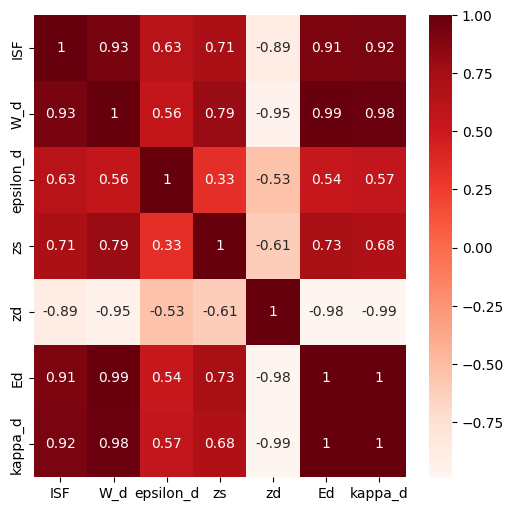

In [26]:
# Heat map of the HousingData
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded=files.upload()
house_df=pd.read_csv('group1.csv')
X_features =house_df.columns[2:9] #Column 0-13 assigning them as x1,x2,x3,...
print(X_features)

X=sm.add_constant(house_df[X_features])
Y=house_df["ISF"]  # Column 14 is assigned to Y


train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()
import matplotlib.pyplot as plt
import seaborn as sns

cols=house_df.columns[0:14]
cor_df=house_df[cols].corr()

#correlation with target variable
cor_target= dict(abs(cor_df["ISF"]))
tgt= list(cor_target.keys())
val=list(cor_target.values())

cor_tgt_dict={"Target": tgt, "Value": val}
cor_tgt_df=pd.DataFrame(cor_tgt_dict)
features_df=cor_tgt_df[cor_tgt_df["Value"] > 0.5]
imp_features= list(features_df["Target"])
cor=house_df[imp_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [27]:
#From the above Heat map we found that X features are most affecting our target
#But earlier we found that INDUS was having P value much higher ...
uploaded=files.upload()
house_df=pd.read_csv('group1.csv')
X_features=["kappa_d", "Ed", "zd", "W_d"]
print(X_features)
X=sm.add_constant(house_df[X_features])
Y=house_df["ISF"]
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()

Saving group1.csv to group1 (4).csv
['kappa_d', 'Ed', 'zd', 'W_d']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.893    
Dependent Variable: ISF              AIC:                1001.9359
Date:               2023-10-16 12:25 BIC:                1015.2057
No. Observations:   105              Log-Likelihood:     -495.97  
Df Model:           4                F-statistic:        218.0    
Df Residuals:       100              Prob (F-statistic): 1.91e-48 
R-squared:          0.897            Scale:              778.93   
------------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025     0.975] 
------------------------------------------------------------------
const       -938.2967 342.7272 -2.7377 0.0073 -1618.2577 -258.3357
kappa_d       40.2816   7.5594  5.3286 0.0000    25.2839   55.2793
Ed          -148.1360  27.6680 -5.3541 0.0000  -203.0285  -93.2435
zd            67.6272  37.4128  1.8076 0.0737    -6.5987  141.8531
W_d           99.8524  15.0273  6.6447 0.0000    70.0387  129.6662
------------------------------------------------------------------
Omnibus:              4.119         Durbin-Watson:           1.948
Prob(Omnibus):        0.128         Jarque-Bera (JB):        3.669
Skew:                 -0.452        Prob(JB):                0.160
Kurtosis:             3.142         Condition No.:           2382 
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [18]:
#Dropped TAX R_sq=0.726
uploaded=files.upload()
house_df=pd.read_csv('HousingData.csv')
X_features=["LSTAT", "RM", "PTRATIO", "INDUS"]
print(X_features)
X=sm.add_constant(house_df[X_features])
Y=house_df["MEDV"]
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.75,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()

Saving HousingData.csv to HousingData (3).csv
['LSTAT', 'RM', 'PTRATIO', 'INDUS']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.722    
Dependent Variable: MEDV             AIC:                1752.3431
Date:               2023-10-15 19:32 BIC:                1770.7780
No. Observations:   295              Log-Likelihood:     -871.17  
Df Model:           4                F-statistic:        192.2    
Df Residuals:       290              Prob (F-statistic): 3.01e-80 
R-squared:          0.726            Scale:              21.878   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      21.0790     4.6996    4.4852   0.0000   11.8293   30.3287
LSTAT      -0.4737     0.0536   -8.8311   0.0000   -0.5793   -0.3681
RM          4.2462     0.5099    8.3278   0.0000    3.2426    5.2497
PTRATIO    -0.9811     0.1420   -6.9069   0.0000   -1.2606   -0.7015
INDUS      -0.1227     0.0514   -2.3863   0.0177   -0.2239   -0.0215
------------------------------------------------------------------
Omnibus:              75.041       Durbin-Watson:          1.837  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       177.969
Skew:                 1.217        Prob(JB):               0.000  
Kurtosis:             5.924        Condition No.:          469    
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

In [19]:
# Dropped INDUS R_sq= 0.731
uploaded=files.upload()
house_df=pd.read_csv('HousingData.csv')
X_features=["LSTAT", "RM", "PTRATIO", "TAX"]
print(X_features)
X=sm.add_constant(house_df[X_features])
Y=house_df["MEDV"]
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.75,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()

Saving HousingData.csv to HousingData (4).csv
['LSTAT', 'RM', 'PTRATIO', 'TAX']


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.727    
Dependent Variable: MEDV             AIC:                1747.0627
Date:               2023-10-15 19:32 BIC:                1765.4976
No. Observations:   295              Log-Likelihood:     -868.53  
Df Model:           4                F-statistic:        197.0    
Df Residuals:       290              Prob (F-statistic): 2.26e-81 
R-squared:          0.731            Scale:              21.490   
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      18.8293     4.7295    3.9812   0.0001    9.5208   28.1378
LSTAT      -0.4460     0.0538   -8.2863   0.0000   -0.5519   -0.3400
RM          4.4990     0.5112    8.8008   0.0000    3.4928    5.5051
PTRATIO    -0.8874     0.1461   -6.0739   0.0000   -1.1750   -0.5999
TAX        -0.0068     0.0021   -3.3219   0.0010   -0.0109   -0.0028
------------------------------------------------------------------
Omnibus:              88.493       Durbin-Watson:          1.824  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       241.999
Skew:                 1.372        Prob(JB):               0.000  
Kurtosis:             6.486        Condition No.:          7865   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 7.86e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

['LSTAT', 'RM', 'PTRATIO', 'INDUS']


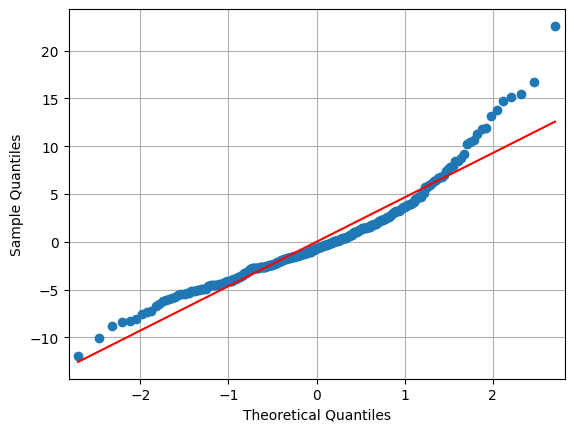

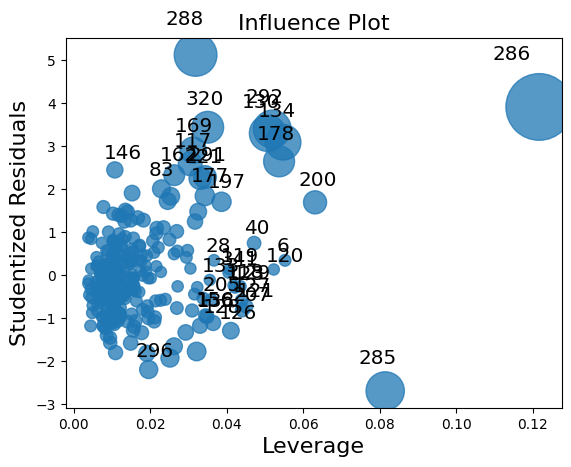

In [24]:
# Residual Analysis
# uploaded=files.upload()
# house_df=pd.read_csv('HousingData.csv')
X_features=["LSTAT", "RM", "PTRATIO", "INDUS"]
print(X_features)
X=sm.add_constant(house_df[X_features])
Y=house_df["MEDV"]
train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.75,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
fig=sm.qqplot(house_lrm.resid, line='s')
plt.grid()

#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(house_lrm)
plt.show()

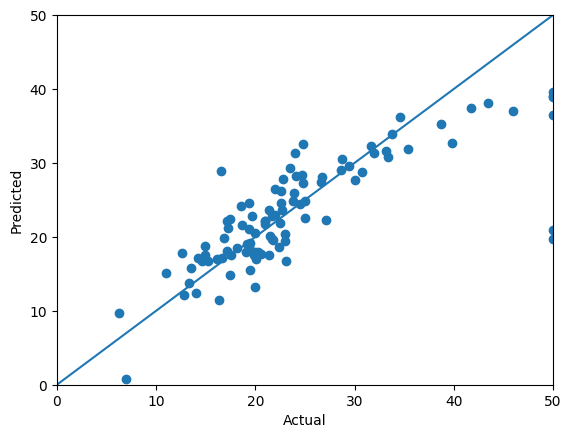

In [27]:
#Prediction
pred_Y= house_lrm.predict(test_X)
plt.xlabel("Actual"), plt.ylabel("Predicted")
plt.xlim(0,50), plt.ylim(0,50)
plt.scatter(test_Y, pred_Y)
plt.axline((0,0), (1,1) )

In [1]:
#Simple Linear regression
import numpy as np
import pandas as pd
X=np.array([10.2,12.9, 13.6, 14.6, 14, 11.5, 10.1, 9.5])
Y=([89.05, 93.74, 94.45, 96.73, 93.65, 92.52, 89.45, 87.33])
x=np.mean(X)
y=np.mean(Y)
print(x)
print(y)

12.05
92.11500000000001


In [2]:
sxy=(X-x)*(Y-y)
Sxy=sum(sxy)
print(Sxy)

sxx=(X-x)**2
Sxx=sum(sxx)
print(Sxx)

beta=Sxy/Sxx
print(beta)

beta_0= y-beta*x
print(beta_0)

42.60800000000003
27.460000000000004
1.5516387472687554
73.41775309541151


In [5]:
beta_x= X*beta
y_cap= beta_0+ beta_x
print(y_cap)

[89.24446832 93.43389294 94.52004006 96.07167881 95.14069556 91.26159869
 89.08930444 88.15832119]


In [6]:
sst=(Y-y)**2
print(sst)
SST=sum(sst)
print(SST)

[ 9.394225  2.640625  5.452225 21.298225  2.356225  0.164025  7.102225
 22.896225]


In [15]:
ssr=(y_cap-y)**2
print(ssr)
SSR=sum(ssr)
print(SSR)
MSR=SSR

[ 8.23995214  1.73947857  5.78421768 15.65530717  9.1548336   0.7282938
  9.1548336  15.65530717]
66.11222374362713


In [16]:
sse=(y_cap-Y)**2
print(sse)
SSE=sum(sse)
print(SSE)

MSE=SSE/8 # MSE = SSE/N-2
print(MSE)
F=MSR/MSE
print(F)

[0.03781793 0.09370154 0.00490561 0.4333868  2.22217324 1.58357386
 0.13010128 0.686116  ]
5.191776256372869
0.6489720320466086
101.8722232684428


In [18]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded=files.upload()
house_df=pd.read_csv('group1.csv')
X_features =house_df.columns[2:9] #Column 0-13 assigning them as x1,x2,x3,...
print(X_features)

X=sm.add_constant(house_df[X_features])
Y=house_df["ISF"]  # Column 14 is assigned to Y


train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()

Saving group1.csv to group1.csv
Index(['W_d', 'epsilon_d', 'zs', 'zd', '1/r0', 'Ed', 'kappa_d'], dtype='object')


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:               OLS              Adj. R-squared:     0.919   
Dependent Variable:  ISF              AIC:                975.1453
Date:                2023-10-16 12:13 BIC:                996.3770
No. Observations:    105              Log-Likelihood:     -479.57 
Df Model:            7                F-statistic:        170.2   
Df Residuals:        97               Prob (F-statistic): 1.48e-51
R-squared:           0.925            Scale:              587.63  
------------------------------------------------------------------
            Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------
const     -2003.4224 415.7680 -4.8186 0.0000 -2828.6068 -1178.2380
W_d         115.5898  17.8283  6.4835 0.0000    80.2056   150.9741
epsilon_d   -21.5483   4.8052 -4.4844 0.0000   -31.0852   -12.0113
zs          390.1453 114.4528  3.4088 0.0010   162.9882   617.3023
zd           59.8794  39.9621  1.4984 0.1373   -19.4343   139.1931
1/r0       1575.1932 306.0963  5.1461 0.0000   967.6768  2182.7095
Ed          -92.2437  74.2302 -1.2427 0.2170  -239.5701    55.0826
kappa_d      18.2269  21.7824  0.8368 0.4048   -25.0051    61.4590
------------------------------------------------------------------
Omnibus:               2.100        Durbin-Watson:           2.179
Prob(Omnibus):         0.350        Jarque-Bera (JB):        1.841
Skew:                  0.205        Prob(JB):                0.398
Kurtosis:              2.497        Condition No.:           3728 
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [25]:
# Heat map of the HousingData
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from google.colab import files
uploaded=files.upload()
house_df=pd.read_csv('group1.csv')
X_features =house_df.columns[2:9] #Column 0-13 assigning them as x1,x2,x3,...
print(X_features)

X=sm.add_constant(house_df[X_features])
Y=house_df["ISF"]  # Column 14 is assigned to Y


train_X,test_X, train_Y, test_Y= train_test_split(X,Y,
                                                  train_size=0.99,
                                                  random_state=42)

house_lrm= sm.OLS(train_Y, train_X).fit()
house_lrm.summary2()


cols=house_df.columns[2:9]
cor_df=house_df[cols].corr()

#correlation with target variable
cor_target= dict(abs(cor_df["ISF"]))
tgt= list(cor_target.keys())
val=list(cor_target.values())

cor_tgt_dict={"Target": tgt, "Value": val}
cor_tgt_df=pd.DataFrame(cor_tgt_dict)
features_df=cor_tgt_df[cor_tgt_df["Value"] > 0.5]
imp_features= list(features_df["Target"])
cor=house_df[imp_features].corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

Saving group1.csv to group1 (2).csv
Index(['W_d', 'epsilon_d', 'zs', 'zd', '1/r0', 'Ed', 'kappa_d'], dtype='object')


KeyError: ignored